In [117]:
import pandas as pd
import numpy as np

# Variáveis

In [217]:
df = pd.read_csv(path, engine='python')

In [57]:
import csv

path = r'mymoviedb.csv'

# Fazendo assim, pois o read_csv pandas está dando erros (NaNs, valores onde não deveriam...)
row_list = []
with open(path, 'r') as f:
    reader = csv.reader(f)
    headers = next(reader)
    for row in reader:
        row_list.append(row)

df = pd.DataFrame(row_list, columns=headers)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [77]:
# Resolvendo o erro
# Na pergunta de obter o valor máximo, seria ideal converter para int. Mas há um erro de formatação no arquivo:
df.loc[df.isna().any(axis=1)]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1105,2013-10-20,Pixie Hollow Bake Off,Tink challenges Gelata to see who can bake the...,None,None,None,None,None,None
1106,- Just Desserts,None,None,None,None,None,None,None,None
1107,- If The Hue Fits,None,None,None,None,None,None,None,None
1108,- Dust Up,None,None,None,None,None,None,None,None
1109,- Scents And Sensibility,None,None,None,None,None,None,None,None
1110,- Just One Of The Girls,None,None,None,None,None,None,None,None
1111,- Volleybug,None,None,None,None,None,None,None,None
1112,- Hide And Tink,None,None,None,None,None,None,None,None
1113,- Rainbow's Ends,None,None,None,None,None,None,None,None
1114,- Fawn And Games,None,None,None,None,None,None,None,None


Faz-se uma alteração simples:

In [153]:
df_foo = df.copy()
df_foo = df.loc[df.isna().any(axis=1)]
df_foo_a = df_foo.head(1).dropna(axis=1).reset_index(drop=True)
df_foo_b = df_foo.tail(1).dropna(axis=1).iloc[:, 1:].reset_index(drop=True)
df_foo_b.columns = df_foo.columns[3:]

df_foo_c = df_foo.iloc[1:,:1]


new_overview = ''
for name in  np.concat([df_foo_a[['Overview']].values, df_foo_c.values]):
    new_overview += name[0] + '\\n'

df_ham = pd.concat([df_foo_a, df_foo_b], axis=1)
df_ham.loc[0, 'Overview'] = new_overview
df_ham['Overview'].index


RangeIndex(start=0, stop=1, step=1)

In [161]:
df_1 = df.copy()
df_1 = df_1.dropna()
df_2 = pd.concat([df_1.iloc[:1105, :], df_ham, df_1.iloc[1105:, :]])

# Perguntas:

1 - Qual as colunas do dataset?

In [162]:
df_2.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [163]:
df_2.shape

(9827, 9)

In [164]:
df.shape[0]

9837

In [166]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9827 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Release_Date       9827 non-null   object
 1   Title              9827 non-null   object
 2   Overview           9827 non-null   object
 3   Popularity         9827 non-null   object
 4   Vote_Count         9827 non-null   object
 5   Vote_Average       9827 non-null   object
 6   Original_Language  9827 non-null   object
 7   Genre              9827 non-null   object
 8   Poster_Url         9827 non-null   object
dtypes: object(9)
memory usage: 767.7+ KB


In [ ]:
df_3 = df_2.copy().reset_index(drop=True) # Por causa da concatenação, pode dar problemas com index. Então refaz-se.
df_3[['Popularity', 'Vote_Average', 'Vote_Count']] = df_3[['Popularity', 'Vote_Average', 'Vote_Count']].astype(float)

In [172]:
df_2.iloc[df_2['Vote_Count'].astype(int).idxmax()]

Release_Date                                                2010-07-15
Title                                                        Inception
Overview             Cobb, a skilled thief who commits corporate es...
Popularity                                                     127.131
Vote_Count                                                       31077
Vote_Average                                                       8.4
Original_Language                                                   en
Genre                               Action, Science Fiction, Adventure
Poster_Url           https://image.tmdb.org/t/p/original/edv5CZvWj0...
Name: 380, dtype: object

In [184]:
df_3.iloc[df_3['Vote_Average'].idxmax()]

Release_Date                                                2020-04-09
Title                                       Kung Fu Master Huo Yuanjia
Overview             The young and vigorous Huo Yuanjia was only fo...
Popularity                                                      13.745
Vote_Count                                                         1.0
Vote_Average                                                      10.0
Original_Language                                                   zh
Genre                                                    Action, Drama
Poster_Url           https://image.tmdb.org/t/p/original/boXAHksMko...
Name: 9391, dtype: object

In [ ]:
# Não podemos só usar value_counts, há filmes com mesmo nomes, mas com anos diferentes:
print(df_3['Title'].value_counts().idxmax()) # Há 4 Alice in Wonderland, todos diferentes filmes

# Então separa-se por título, ano:
(df_3.groupby(['Title', 'Release_Date']).size() > 1).any()

Alice in Wonderland


np.False_

In [193]:
# Respondendo essa pergunta com a df original:
df.isna().any().any()

np.True_

In [226]:
# Quantidade:
df.isna().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [230]:
# Proporção por coluna:
df.isna().sum() / df.count()

Release_Date         0.000000
Title                0.000916
Overview             0.000916
Popularity           0.001018
Vote_Count           0.001018
Vote_Average         0.001018
Original_Language    0.001018
Genre                0.001119
Poster_Url           0.001119
dtype: float64

In [234]:
#Proporção por total:
df.isna().sum().sum() / df.count().sum()

np.float64(0.0009044351237380303)

# Insights

In [241]:
df_4 = df_3.copy()
df_4['Release_Date'] = pd.to_datetime(df_4['Release_Date'])

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
lang_list = df_4['Original_Language'].value_counts().nlargest(5).index.to_list()
df_5 = df_4.copy()
df_5['Original_Language'] = df_5.Original_Language.map(lambda x: x if x in lang_list else 'Outro')

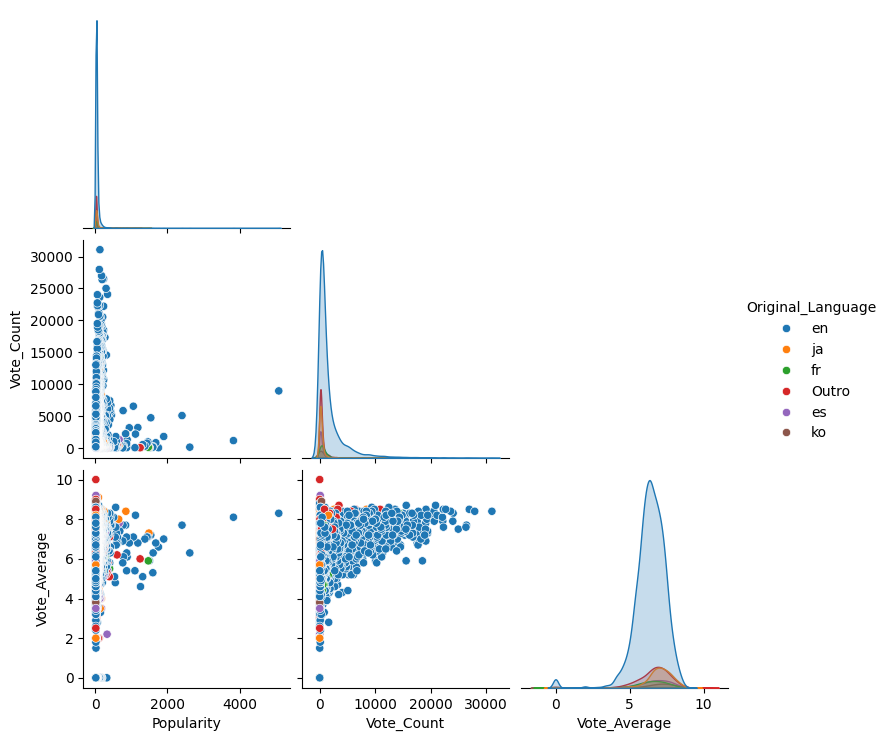

In [255]:
sns.pairplot(df_5, hue='Original_Language', corner=True)

In [ ]:
df_plot = df_5.groupby(['Genre', 'Year']).agg({'Vote_Average':'mean',
                                                'Vote_Count':'sum', 'Popularity':'sum'}).reset_index()
# Assumindo que o primeiro gênero é o principal
# Também poderia se fazer um multiclassificação, mas hoje não.
df_plot['Genre'] = df_plot['Genre'].map(lambda x: x.split(',')[0].strip())


# Remover alguns, porque o gráfico ficou ilegível.
genre_list = df_plot['Genre'].value_counts().nlargest(2).index.to_list()
df_plot['Genre'] = df_plot['Genre'].map(lambda x: x if x in genre_list else 'Outro')

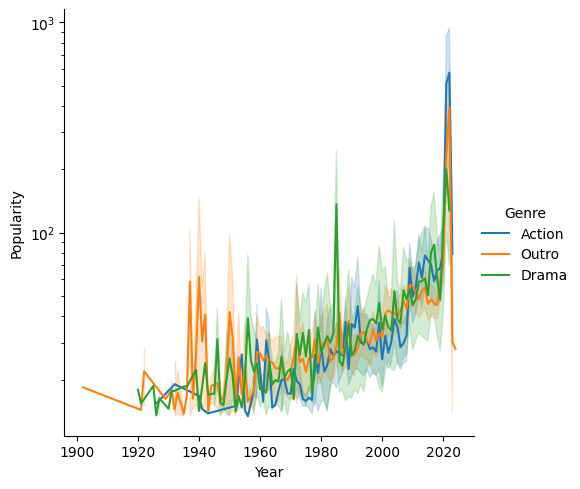

In [285]:
ax1 = sns.relplot(data=df_plot, y='Popularity', x='Year', hue='Genre', kind='line')
ax1.ax.set_yscale('log')
plt.show()

In [287]:
df_plot = df_5.groupby(['Genre', 'Year']).agg({'Vote_Average':'mean',
                                                'Vote_Count':'sum', 'Popularity':'sum'}).reset_index()
# Assumindo que o primeiro gênero é o principal
# Também poderia se fazer um multiclassificação, mas hoje não.
df_plot['Genre'] = df_plot['Genre'].map(lambda x: x.split(',')[0].strip())


# Remover alguns, porque o gráfico ficou ilegível.
genre_list = df_plot['Genre'].value_counts().nlargest(8).index.to_list()
df_plot['Genre'] = df_plot['Genre'].map(lambda x: x if x in genre_list else 'Outro')

# TENTAR COM DF_5 DIRETO.

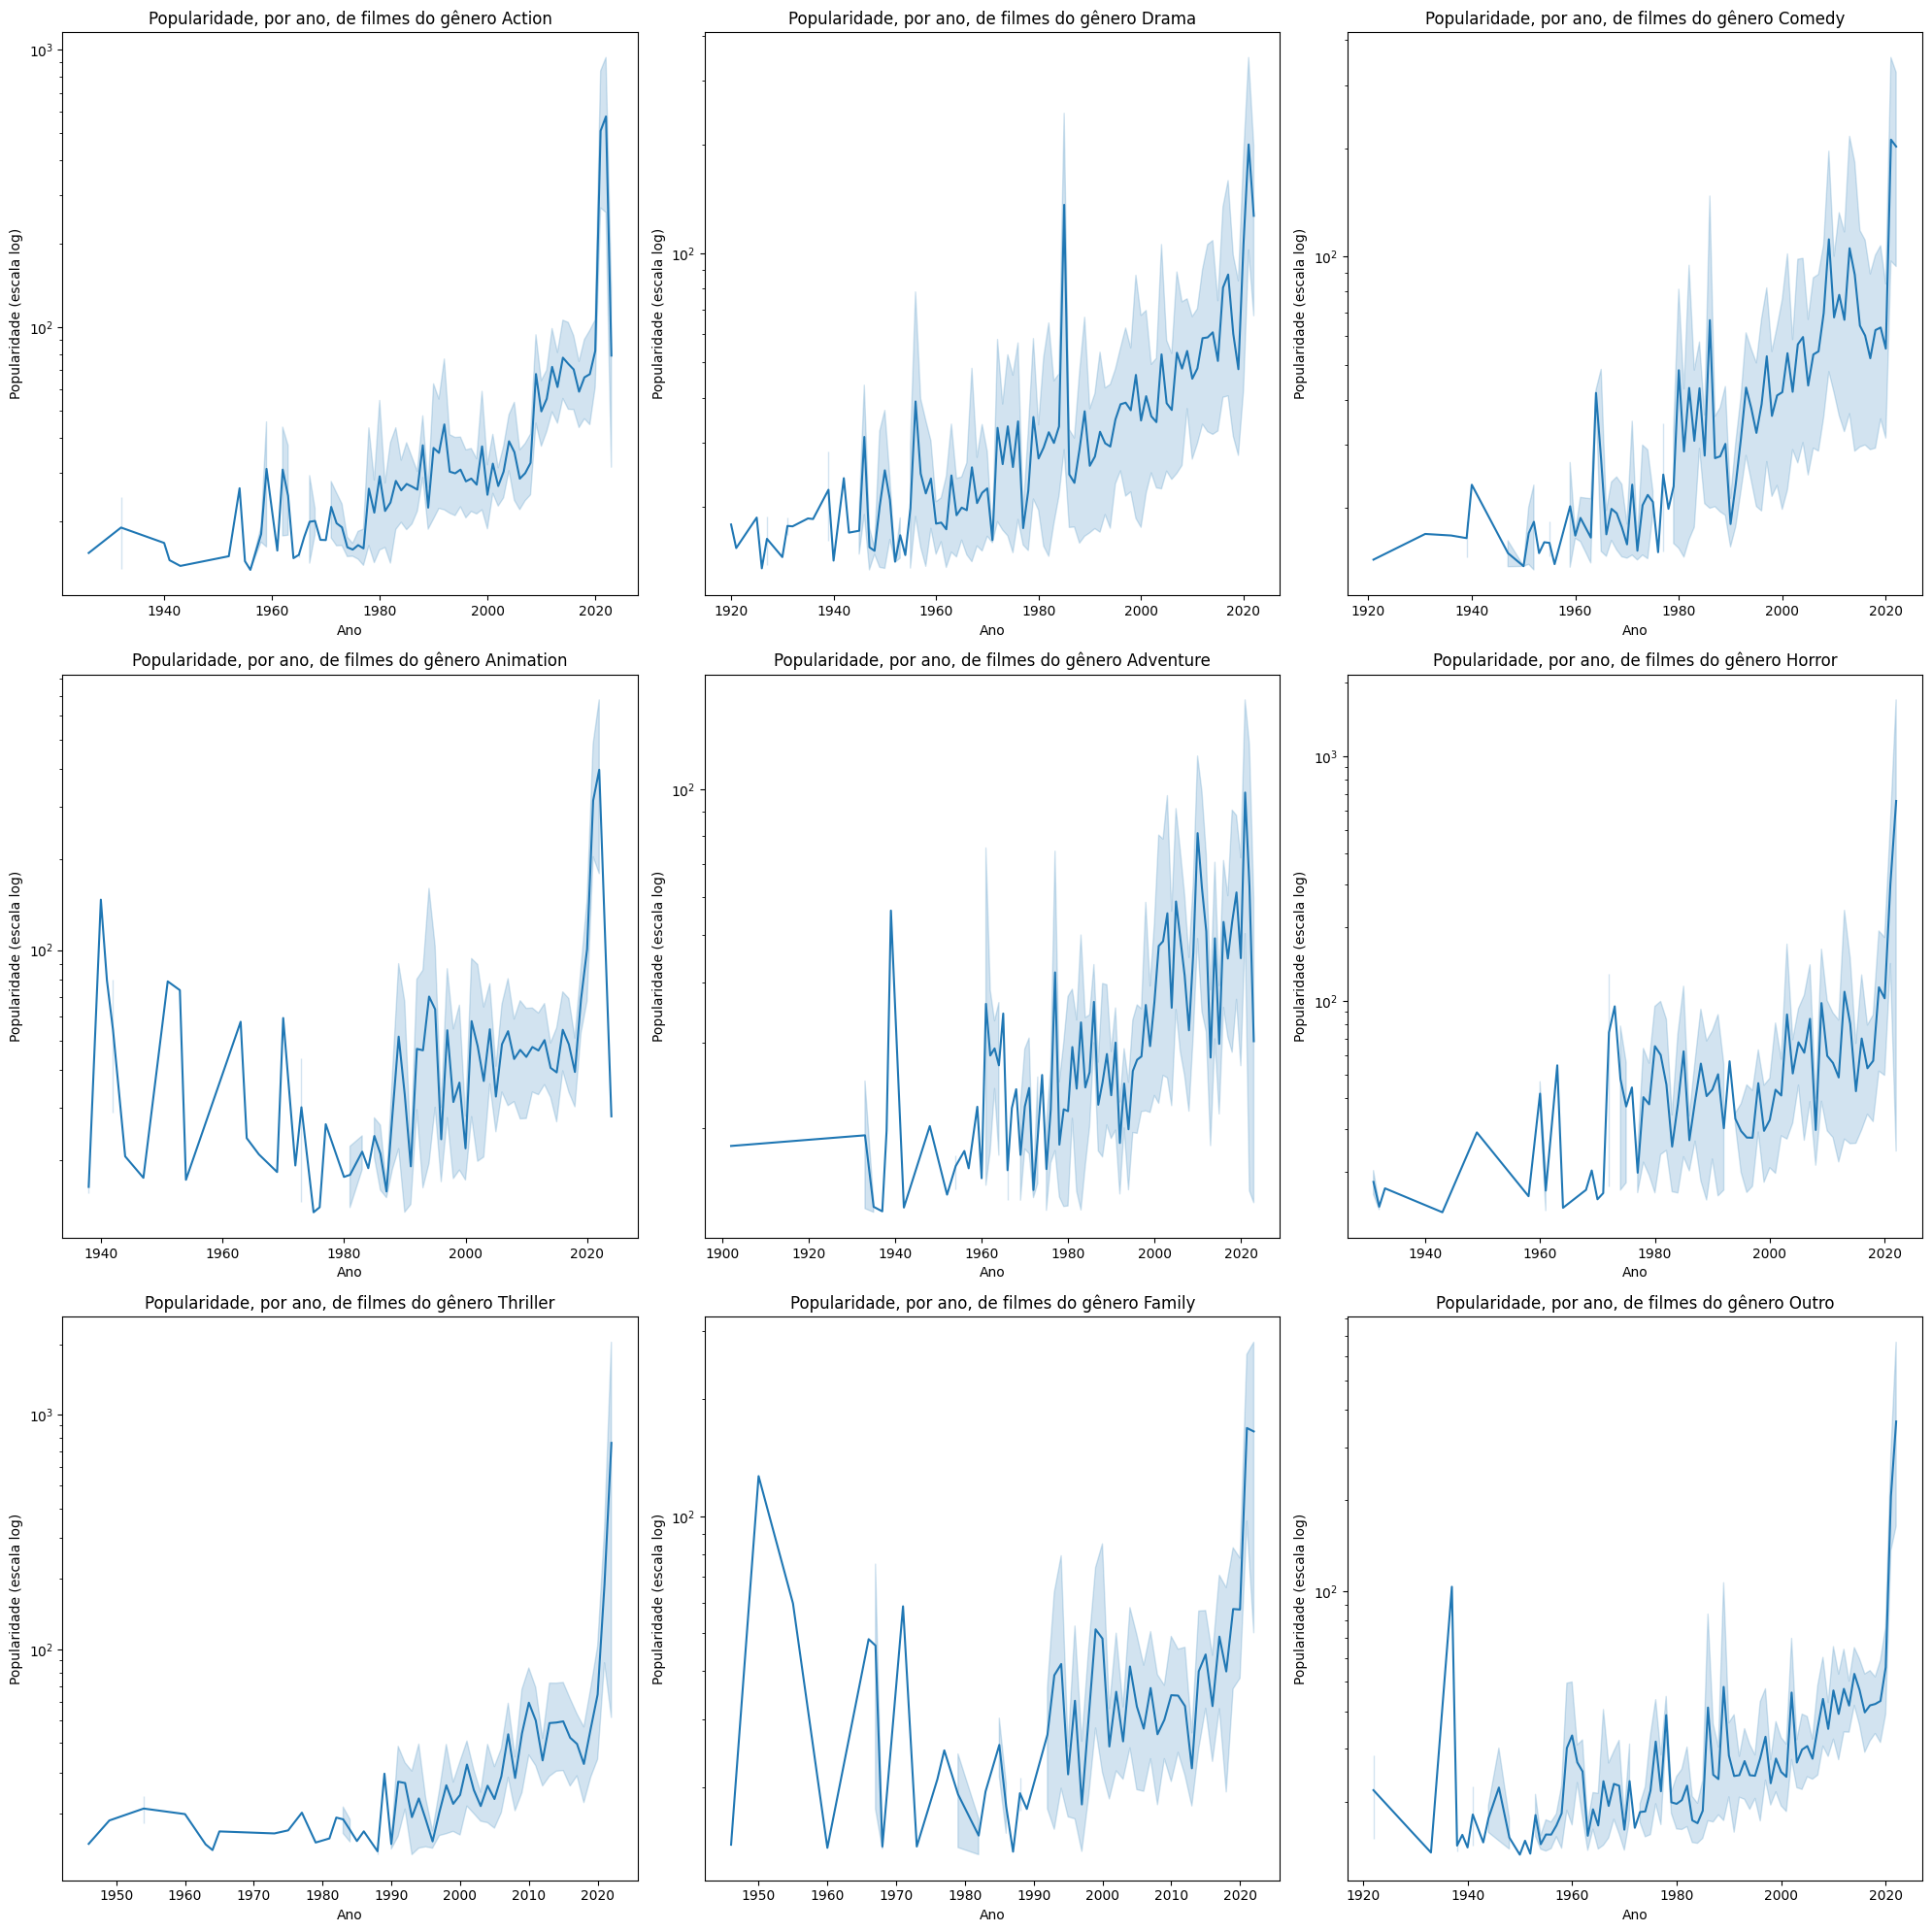

In [295]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()

i=0
for genre in genre_list + ['Outro']:
    df_current = df_plot[df_plot['Genre'] == genre]
    hmm = sns.lineplot(data=df_current, y='Popularity', x='Year', ax=ax[i])
    ax[i].set_title('Popularidade, por ano, de filmes do gênero ' + genre)
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Ano')
    ax[i].set_ylabel('Popularidade (escala log)')
    i += 1

plt.tight_layout()
plt.show()

